Loading libraries for preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rarfile

In [3]:
import os
import cv2
import concurrent.futures
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab.patches import cv2_imshow
from rarfile import RarFile
from PIL import Image

Loading Original Image Dataset

In [4]:
from rarfile import RarFile
rar_folder_path = '/content/drive/My Drive/'
rar_file_path = os.path.join(rar_folder_path,'Rice Leaf Disease Dataset.rar')  # Replace with the actual RAR file name
with RarFile(rar_file_path, 'r') as archive:
    archive.extractall('/content')  # Extract the files to the '/content' directory in Colab

View the original images

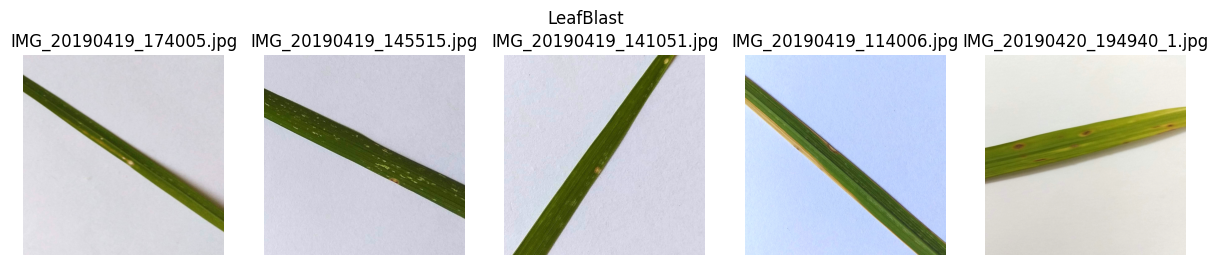

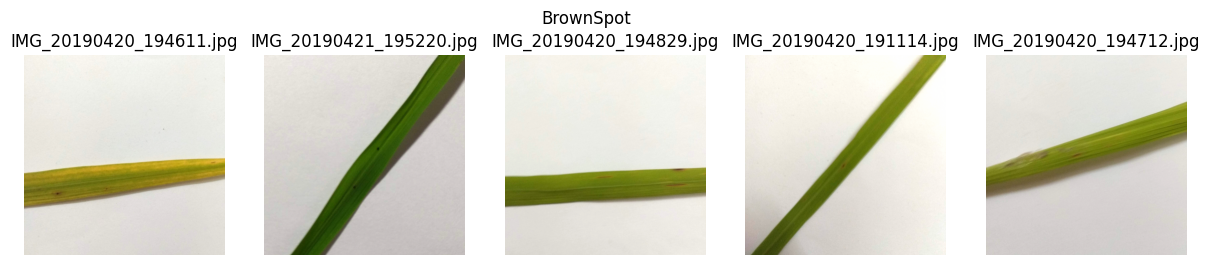

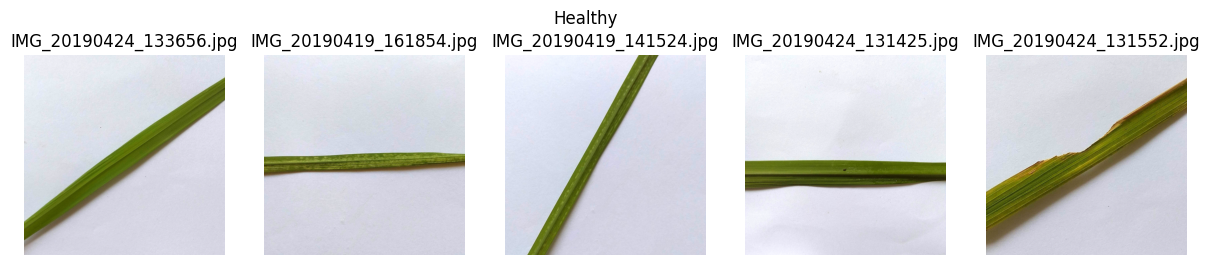

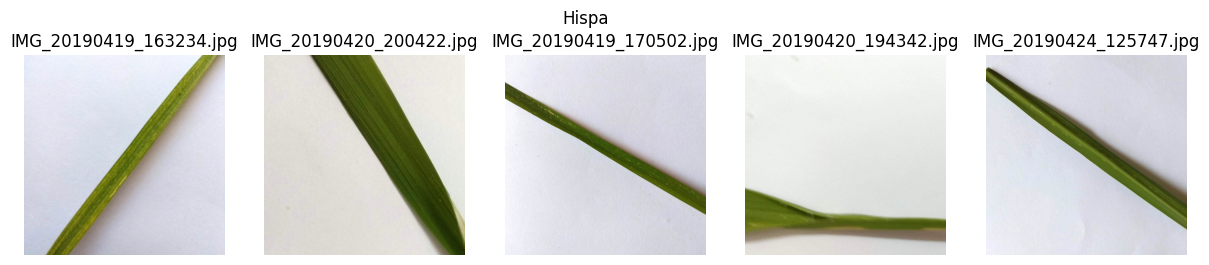

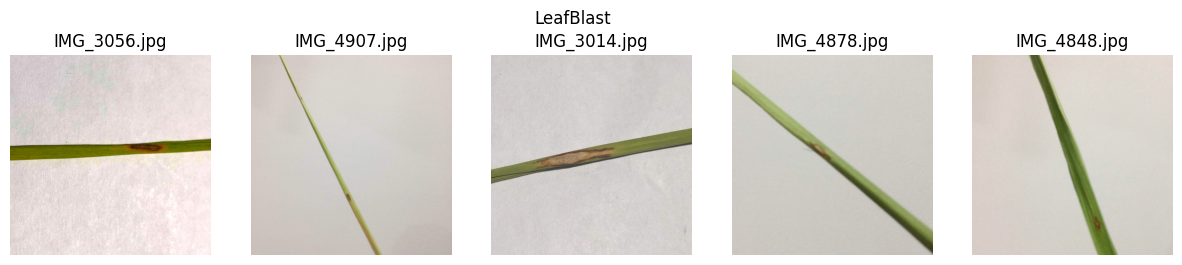

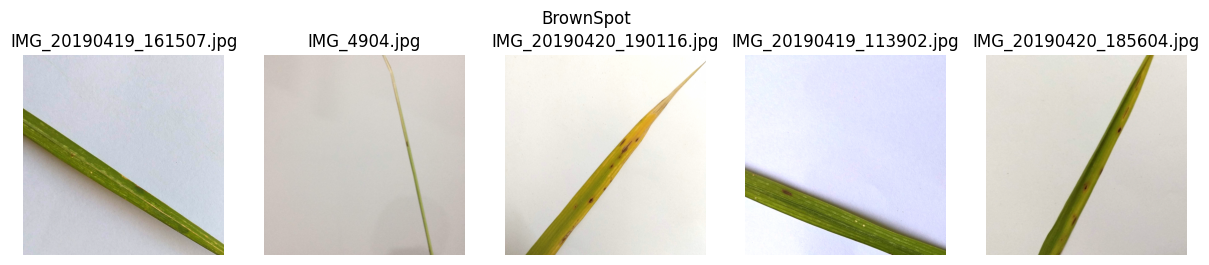

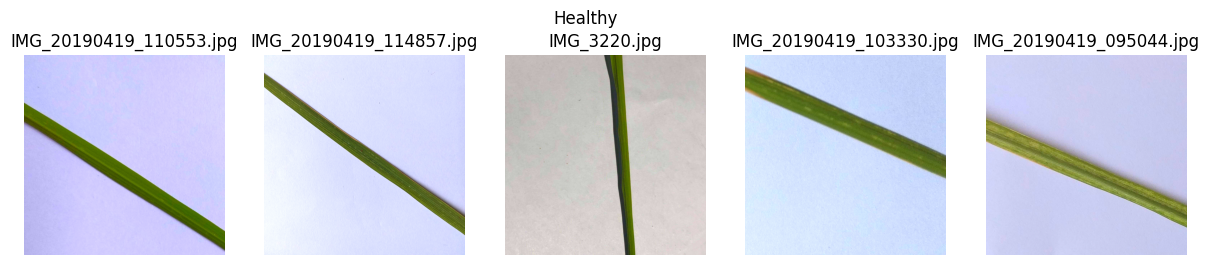

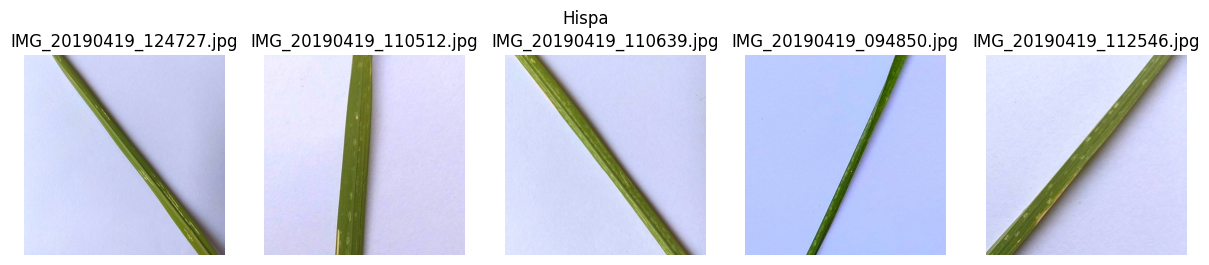

In [5]:
#View the Images from the Rice crop Dataset

# Define the paths to your training and testing datasets
training_path = '/content/RiceLeafs/train'
testing_path = '/content/RiceLeafs/validation'

# List all the class folders in the training and testing datasets
training_classes = os.listdir(training_path)
testing_classes = os.listdir(testing_path)

# Function to display 5 images of each class
def display_images(dataset_path, class_name, num_images=5):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(class_path, image_file)
        plt.subplot(1, num_images, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.suptitle(class_name)
    plt.show()

# Display 5 images of each class in the training dataset
for class_name in training_classes:
    display_images(training_path, class_name)

# Display 5 images of each class in the testing dataset
for class_name in testing_classes:
    display_images(testing_path, class_name)

Image Noise Removal and Leaf Segmentation

In [6]:
import os
import cv2
import numpy as np

# Function for leaf segmentation and replacement
def segment_and_save(image_path, output_folder):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    blurred = cv2.medianBlur(image, ksize=5)

    # Step 3: Define the LAB bounds for the white color (background)
    lower_white = np.array([140, -17, -29])
    upper_white = np.array([255, 255, 255])

    # Create a mask to identify the white background
    mask = cv2.inRange(blurred, lower_white, upper_white)

    # Invert the mask to obtain the leaf and other regions
    mask_inverted = cv2.bitwise_not(mask)

    # Apply the mask to the original image to remove the white background
    result = cv2.bitwise_and(blurred, blurred, mask=mask_inverted)

    # Get the relative path of the image within the class folder
    rel_path = os.path.relpath(image_path, main_folder)

    # Determine the path in the Training_resized folder
    output_path = os.path.join(output_folder, rel_path)

    # Create the directory structure if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the segmented leaf to the Training_resized folder
    cv2.imwrite(output_path, result)

# Paths to the main folder containing class folders and the output folder
main_folder = '/content/RiceLeafs/validation'
output_folder = '/content/RiceLeafs/Validation_segmented'

# List of class folder names
class_folders = os.listdir(main_folder)

# Process each class folder
for class_folder in class_folders:
    class_path = os.path.join(main_folder, class_folder)

    # List of image files in the class folder
    image_files = os.listdir(class_path)

    # Process each image in the class folder
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)

        # Perform leaf segmentation and save the segmented image in the Training_resized folder
        segment_and_save(image_path, output_folder)


Viewing segmented images

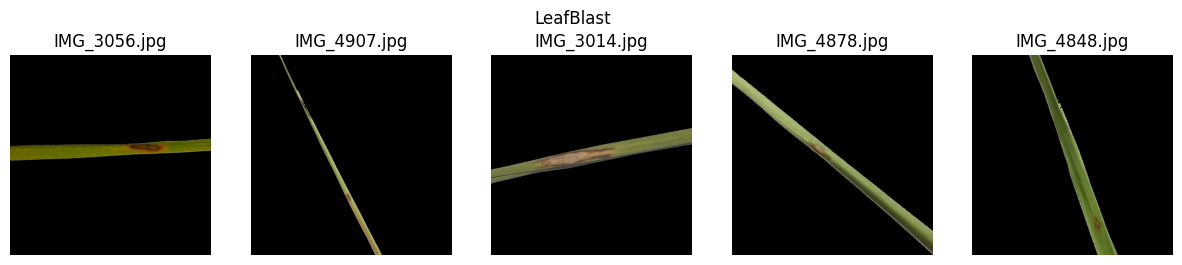

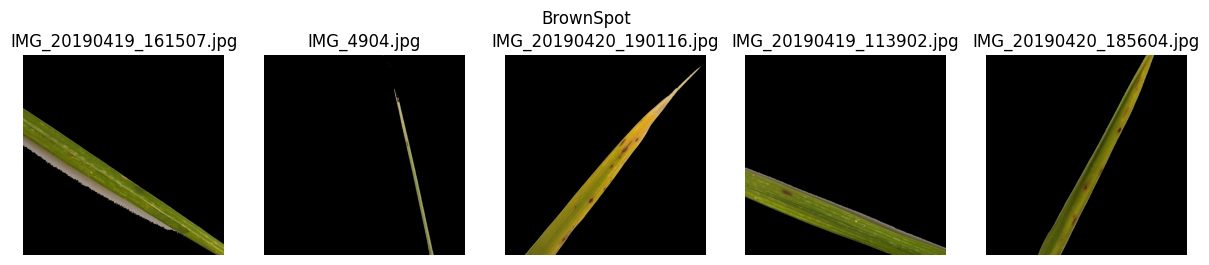

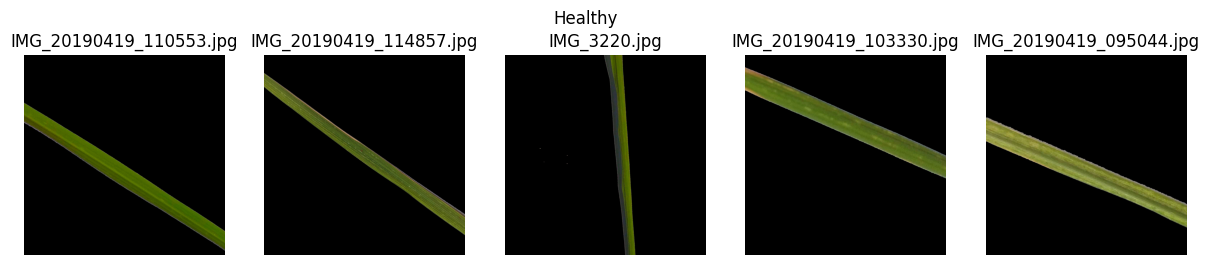

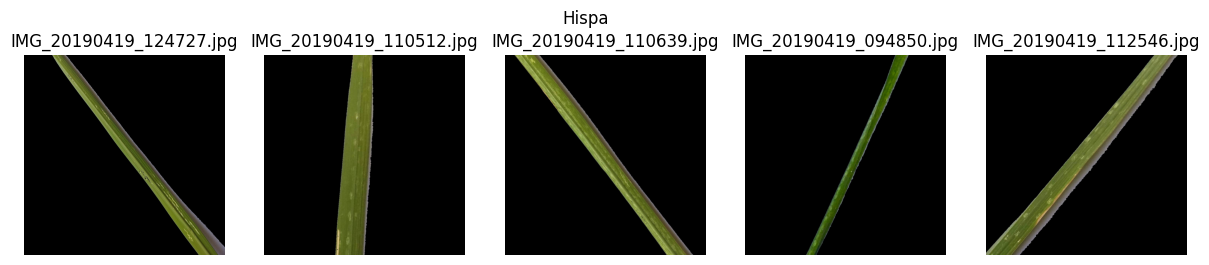

In [9]:
# Define the paths to your training and testing datasets
training_path = '/content/RiceLeafs/Validation_segmented'  # Update this path to your actual training folder path

# List all the class folders in the training and testing datasets
training_classes = os.listdir(training_path)

# Function to display 5 images of each class
def display_images(dataset_path, class_name, num_images=5):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(class_path, image_file)
        plt.subplot(1, num_images, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.suptitle(class_name)
    plt.show()

# Display 5 images of each class in the training dataset
for class_name in training_classes:
    display_images(training_path, class_name)

Resize Segmented and Preprocessed image to size (224*224)

In [10]:
import os
from PIL import Image

# Define the source and destination directories
src_dir = '/content/RiceLeafs/Validation_segmented'
dest_dir = '/content/Validation_resized'

# Define the target size for resizing
target_size = (224, 224)

# Function to create the destination directory structure
def create_dest_dirs(src_path):
    dest_path = os.path.join(dest_dir, os.path.relpath(src_path, src_dir))
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    return dest_path

# Iterate through the source directory and its subdirectories
for root, _, files in os.walk(src_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            # Create the destination directory structure
            dest_path = create_dest_dirs(os.path.join(root, file))

            # Open the source image and resize it
            with Image.open(os.path.join(root, file)) as img:
                img = img.resize(target_size, Image.ANTIALIAS)

                # Save the resized image to the destination directory
                img.save(dest_path, 'JPEG', quality=90)

print("Image resizing and saving complete.")


<ipython-input-10-4eac669150d8>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Image resizing and saving complete.


Viewing the resized images

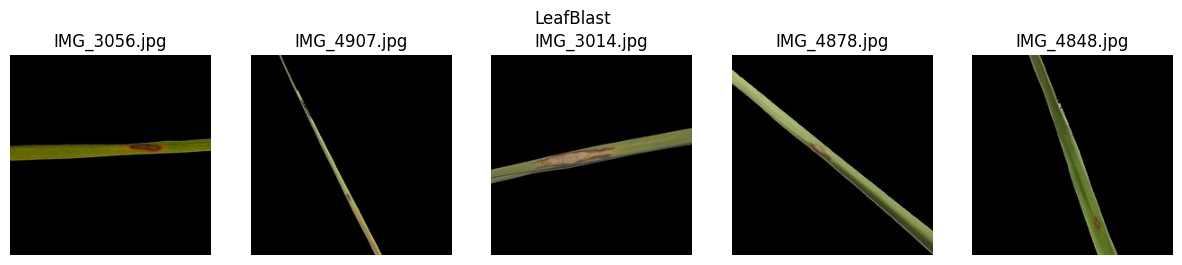

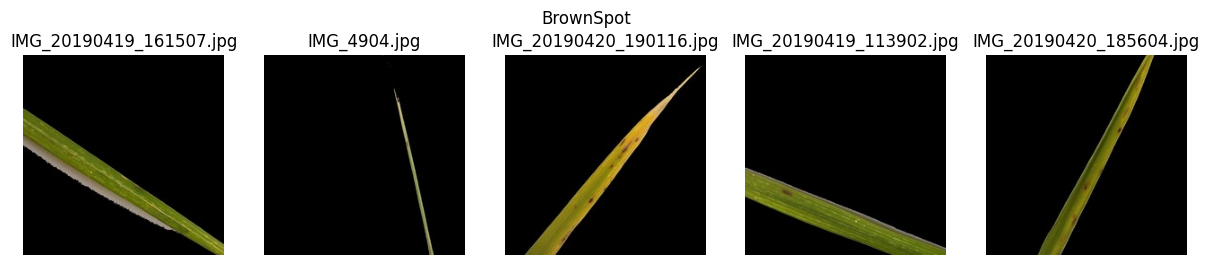

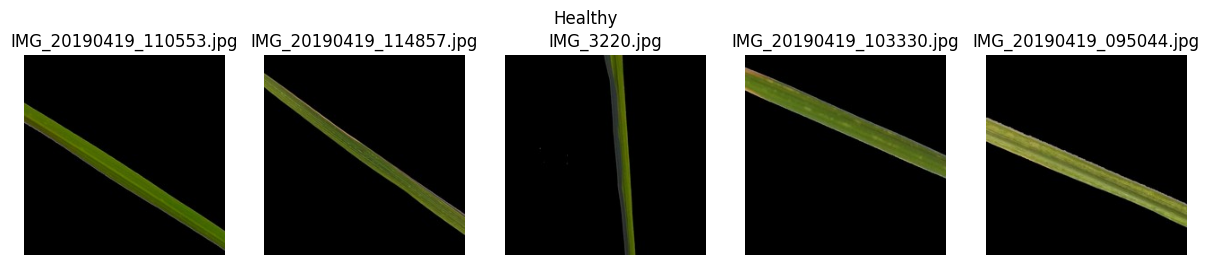

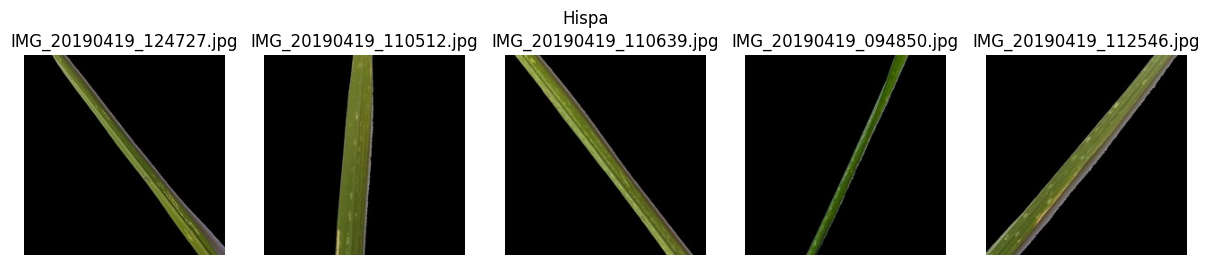

In [11]:
# Define the paths to your training and testing datasets
training_path = '/content/Validation_resized'  # Update this path to your actual training folder path

# List all the class folders in the training and testing datasets
training_classes = os.listdir(training_path)

# Function to display 5 images of each class
def display_images(dataset_path, class_name, num_images=5):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)[:num_images]

    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(class_path, image_file)
        plt.subplot(1, num_images, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
    plt.suptitle(class_name)
    plt.show()

# Display 5 images of each class in the training dataset
for class_name in training_classes:
    display_images(training_path, class_name)

In [12]:
import shutil

source_folder = '/content/Validation_resized'  # Replace with the path to your 'Training_resized' folder
target_folder = '/content/drive/My Drive/'  # Change the target folder as needed

# Copy the 'Training_resized' folder to your Google Drive
shutil.copytree(source_folder, os.path.join(target_folder, 'Validation_resized'))


'/content/drive/My Drive/Validation_resized'

In [13]:


# Define the source and destination directories
src_dir = 'Validation_resized'  # Replace with the actual path to your Training_resized folder
dest_zip_file = '/content/Validation_resized.zip'  # The path for the zip file

# Create a zip file of the Training_resized folder
shutil.make_archive(dest_zip_file.replace('.zip', ''), 'zip', src_dir)

print("Training_resized folder has been zipped.")


Training_resized folder has been zipped.


In [14]:
from google.colab import files

# Download the zip file to your local system
files.download(dest_zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>